In [43]:
# A. Collecte des données

## 1. Source du Corpus
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Installation des dépendances NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DJIBINDIAYE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DJIBINDIAYE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DJIBINDIAYE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

2. Description des données (format, taille, etc.)

In [44]:
class DataDownloader:
    def __init__(self, url, local_filename):
        self.url = url
        self.local_filename = local_filename

    def download_data(self):
        response = requests.get(self.url)
        if response.status_code == 200:
            with open(self.local_filename, 'wb') as file:
                file.write(response.content)
            print(f"Les données ont été téléchargées avec succès dans le fichier {self.local_filename}.")
        else:
            print(f"Échec du téléchargement. Statut de la requête : {response.status_code}")

# Utilisation des classes
url = "https://www.usna.edu/Users/cs/nchamber/data/twitter/general%20tweets.txt"
local_filename = "general_tweets.txt"

# Télécharger les données
print("------------ Télécharger les données ---------------")
downloader = DataDownloader(url, local_filename)
downloader.download_data()


------------ Télécharger les données ---------------
Les données ont été téléchargées avec succès dans le fichier general_tweets.txt.


----------Explorer les données----------------
  Label                                               Text
0   NOT  Bumping dj sefs mixtape nowww this is my music...
1   NOT  #ieroween THE STORY OF IEROWEEN! THE VIDEO ->>...
2   NOT  trick or treating at the mall today; ZOO! last...
3   NOT  @Ussk81 PMSL!!! I try not to stare but I can't...
4   NOT  @Sc0rpi0n676 btw - is there a remote chance i ...
----------Distribution des classes----------------
Distribution des classes :
 Label
NOT      1972
POLIT      28
Name: count, dtype: int64
----------Répartition de la longueur des tweets----------------


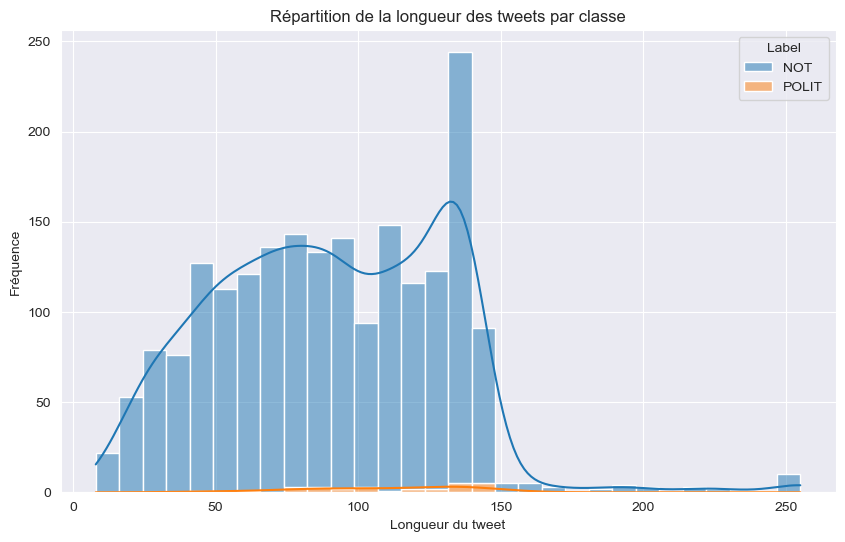

In [45]:
class DataExplorer:
    def __init__(self, filename):
        self.filename = filename
        self.df = None  # Ajoutez une variable pour stocker le DataFrame exploré

    def explore_data(self):
        # Charger les données dans un DataFrame
        self.df = pd.read_csv(self.filename, delimiter='\t', header=None, names=['Label', 'Text'])

        # Afficher les premières lignes du DataFrame pour comprendre la structure des données
        print(self.df.head())

        # Distribution des classes
        print("----------Distribution des classes----------------")
        class_distribution = self.df['Label'].value_counts()
        print("Distribution des classes :\n", class_distribution)

        # Longueur des tweets
        self.df['Tweet_Length'] = self.df['Text'].apply(len)

        # Répartition de la longueur des tweets
        print("----------Répartition de la longueur des tweets----------------")
        plt.figure(figsize=(10, 6))
        sns.histplot(self.df, x='Tweet_Length', hue='Label', bins=30, kde=True, multiple="stack")
        plt.title('Répartition de la longueur des tweets par classe')
        plt.xlabel('Longueur du tweet')
        plt.ylabel('Fréquence')
        plt.show()

    def get_explored_data(self):
        # Renvoie le DataFrame exploré
        return self.df

# Explorer les données
print("----------Explorer les données----------------")
explorer = DataExplorer(filename=local_filename)
explorer.explore_data()
explored_data = explorer.get_explored_data().copy()


In [100]:
class DataPreprocessor:
    def __init__(self, filename):
        self.filename = filename

    def preprocess_data(self):
        # Charger les données dans un DataFrame
        df = pd.read_csv(self.filename, delimiter='\t', header=None, names=['Label', 'Text'])

        # Nettoyage des tweets
        df['Cleaned_Text'] = df['Text'].apply(self.clean_tweet)

        # Tokenisation des tweets
        df['Tokenized_Text'] = df['Cleaned_Text'].apply(self.tokenize_text)

        # Réduction des mots à leur forme de base (utilisation de la lemmatisation)
        df['Lemmatized_Text'] = df['Tokenized_Text'].apply(self.lemmatize_text)

        return df[['Text', 'Label', 'Cleaned_Text', 'Tokenized_Text', 'Lemmatized_Text']]

    def clean_tweet(self, text):
        # Supprimer les mentions
        text = re.sub(r'@[A-Za-z0-9]+', '', text)
        # Supprimer les liens
        text = re.sub('https?://[A-Za-z0-9./]+', '', text)
        # Supprimer la ponctuation et les caractères spéciaux
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Convertir le texte en minuscules
        text = text.lower()
        return text

    def tokenize_text(self, text):
        # Tokenisation des tweets en mots
        tokens = word_tokenize(text)
        return tokens

    def lemmatize_text(self, tokens):
        # Réduction des mots à leur forme de base (utilisation de la lemmatisation)
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        return lemmatized_tokens

# Télécharger les données nécessaires pour NLTK
nltk.download('punkt')
nltk.download('wordnet')

# Prétraitement des données
print("------------ Prétraitement des données ---------------")
preprocessor = DataPreprocessor(filename=local_filename)
preprocessed_data = preprocessor.preprocess_data()

# Afficher les premières lignes du DataFrame résultant
print(preprocessed_data.head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DJIBINDIAYE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DJIBINDIAYE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


------------ Prétraitement des données ---------------
                                                Text Label  \
0  Bumping dj sefs mixtape nowww this is my music...   NOT   
1  #ieroween THE STORY OF IEROWEEN! THE VIDEO ->>...   NOT   
2  trick or treating at the mall today; ZOO! last...   NOT   
3  @Ussk81 PMSL!!! I try not to stare but I can't...   NOT   
4  @Sc0rpi0n676 btw - is there a remote chance i ...   NOT   

                                        Cleaned_Text  \
0  bumping dj sefs mixtape nowww this is my music...   
1  ieroween the story of ieroween the video    ju...   
2  trick or treating at the mall today zoo last y...   
3   pmsl i try not to stare but i cant help it li...   
4   btw  is there a remote chance i will see you ...   

                                      Tokenized_Text  \
0  [bumping, dj, sefs, mixtape, nowww, this, is, ...   
1  [ieroween, the, story, of, ieroween, the, vide...   
2  [trick, or, treating, at, the, mall, today, zo...   
3  [pmsl, i

In [106]:
# B. Représentation du texte

## 1. Utilisation TF-IDF pour la représentation numérique

class TextRepresentation:
    def __init__(self, df):
        self.df = df
        self.vectorizer = None  # Ajoutez cette ligne pour initialiser l'attribut vectorizer

    def tfidf_representation(self):
        # Séparation des données en ensembles d'entraînement et de test
        X_train, X_test, y_train, y_test = train_test_split(self.df['Lemmatized_Text'].apply(' '.join),
                                                            self.df['Label'], test_size=0.2, random_state=42)

        # Création d'un vecteur TF-IDF
        self.vectorizer = TfidfVectorizer()  # Vous pouvez ajuster le nombre maximal de fonctionnalités
        X_train_tfidf = self.vectorizer.fit_transform(X_train)
        X_test_tfidf = self.vectorizer.transform(X_test)

        return X_train_tfidf, X_test_tfidf, y_train, y_test


# Utilisation de la classe TextRepresentation
representation = TextRepresentation(df=preprocessed_data)
X_train_tfidf, X_test_tfidf, y_train, y_test = representation.tfidf_representation()


In [93]:
# Utilisation de la classe DataSplitter
class DataSplitter:
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def split_data(self):
        # Division des données en ensembles d'entraînement, de validation et de test
        X_train, X_temp, y_train, y_temp = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

        return X_train, X_val, X_test, y_train, y_val, y_test


# Utilisation de la classe DataSplitter
splitter = DataSplitter(X=X_train_tfidf, y=y_train)
X_train, X_val, X_test, y_train, y_val, y_test = splitter.split_data()

# Afficher la forme des ensembles
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)

# Création d'un DataFrame pour l'ensemble d'entraînement
train_df = pd.DataFrame(X_train.toarray(), columns=representation.vectorizer.get_feature_names_out())
train_df['Label'] = y_train

# Afficher les premières lignes du DataFrame d'entraînement
print("DataFrame d'entraînement:")
print(train_df.head())

# Création d'un DataFrame pour l'ensemble de test
test_df = pd.DataFrame(X_test.toarray(), columns=representation.vectorizer.get_feature_names_out())
test_df['Label'] = y_test

# Afficher les premières lignes du DataFrame de test
print("\nDataFrame de test:")
print(test_df.head())


Shape of X_train: (1280, 5000)
Shape of X_val: (160, 5000)
Shape of X_test: (160, 5000)
DataFrame d'entraînement:
   aaaaaahhhhhhh  aaaah  aahh  aan  aaron   ab  abandoned  abba  abis  able  \
0            0.0    0.0   0.0  0.0    0.0  0.0        0.0   0.0   0.0   0.0   
1            0.0    0.0   0.0  0.0    0.0  0.0        0.0   0.0   0.0   0.0   
2            0.0    0.0   0.0  0.0    0.0  0.0        0.0   0.0   0.0   0.0   
3            0.0    0.0   0.0  0.0    0.0  0.0        0.0   0.0   0.0   0.0   
4            0.0    0.0   0.0  0.0    0.0  0.0        0.0   0.0   0.0   0.0   

   ...  zii  zijn  zina  zombie  zombifiedhalloween  zona  zone  zoo  zoough  \
0  ...  0.0   0.0   0.0     0.0                 0.0   0.0   0.0  0.0     0.0   
1  ...  0.0   0.0   0.0     0.0                 0.0   0.0   0.0  0.0     0.0   
2  ...  0.0   0.0   0.0     0.0                 0.0   0.0   0.0  0.0     0.0   
3  ...  0.0   0.0   0.0     0.0                 0.0   0.0   0.0  0.0     0.0   
4  ...  0.0

In [102]:
# C. Modélisation

## 1. Sélection du modèle de classification (Naive Bayes)

class TextClassifier:
    def __init__(self, X_train, X_validation, X_test, y_train, y_validation, y_test):
        self.X_train = X_train
        self.X_validation = X_validation
        self.X_test = X_test
        self.y_train = y_train
        self.y_validation = y_validation
        self.y_test = y_test
        self.classifier = MultinomialNB()

    def train_classifier(self, X, y):
        # Entraîner le classificateur sur les données d'entraînement
        self.classifier.fit(X, y)

    def evaluate_classifier(self, X, y, set_name):
        # Prédire les labels sur les données
        y_pred = self.classifier.predict(X)

        # Évaluer la performance du modèle
        accuracy = accuracy_score(y, y_pred)
        print(f"Précision sur l'ensemble {set_name}: {accuracy:.4f}\n")

        # Afficher le rapport de classification
        print(f"Rapport de classification sur l'ensemble {set_name}:\n")
        print(classification_report(y, y_pred))

        # Afficher la matrice de confusion
        print(f"Matrice de confusion sur l'ensemble {set_name}:\n")
        print(confusion_matrix(y, y_pred))

        # Visualiser la matrice de confusion avec seaborn
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y)),
                    yticklabels=sorted(set(y)))
        plt.title(f"Matrice de confusion sur l'ensemble {set_name}")
        plt.xlabel('Prédiction')
        plt.ylabel('Vraie valeur')
        plt.show()

    def classify(self, tweet):
        # Prétraitement du tweet (nettoyage, lemmatisation, etc.) si nécessaire

        # Utilisez le modèle pour classer le tweet
        tweet_tfidf = self.vectorizer.transform([tweet])
        prediction = self.classifier.predict(tweet_tfidf)

        # Retournez le résultat de la classification
        return prediction[0]


# Utilisation de la classe TextClassifier pour entraîner le modèle
classifier = TextClassifier(X_train_tfidf, X_val, X_test_tfidf, y_train, y_val, y_test)
classifier.train_classifier(X_train, y_train)

# Évaluer le classificateur sur l'ensemble de test
classifier.evaluate_classifier(X_test, y_test, "de test")


ValueError: Found input variables with inconsistent numbers of samples: [1280, 1600]

Précision sur l'ensemble de test: 0.9850

Rapport de classification sur l'ensemble de test:

              precision    recall  f1-score   support

         NOT       0.98      1.00      0.99       394
       POLIT       0.00      0.00      0.00         6

    accuracy                           0.98       400
   macro avg       0.49      0.50      0.50       400
weighted avg       0.97      0.98      0.98       400

Matrice de confusion sur l'ensemble de test:

[[394   0]
 [  6   0]]


C:\Users\DJIBINDIAYE\.conda\envs\TPE_DataMining\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DJIBINDIAYE\.conda\envs\TPE_DataMining\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DJIBINDIAYE\.conda\envs\TPE_DataMining\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

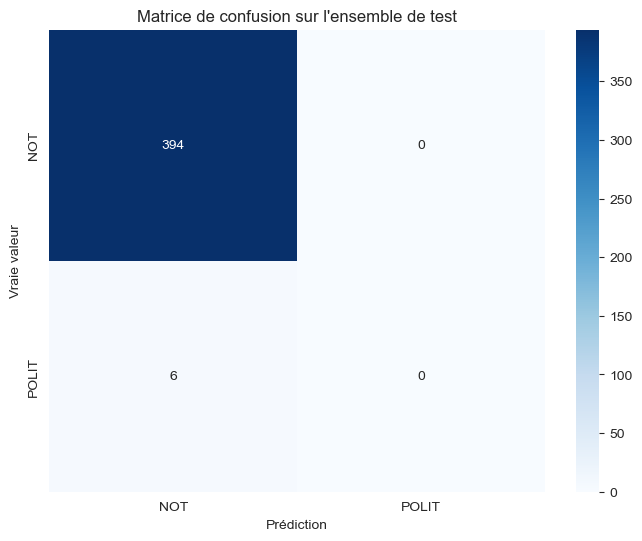

Classification du tweet : NOT


In [117]:
# C. Modélisation

## 1. Sélection du modèle de classification (Naive Bayes)

class TextClassifier:
    def __init__(self, X_train, X_validation, X_test, y_train, y_validation, y_test, vectorizer):
        self.X_train = X_train
        self.X_validation = X_validation
        self.X_test = X_test
        self.y_train = y_train
        self.y_validation = y_validation
        self.y_test = y_test
        self.classifier = MultinomialNB()
        self.preprocessor = preprocessor
        self.vectorizer = vectorizer  # Utilisez le vectorizer fourni en argument

    def train_classifier(self, X, y):
        # Entraîner le classificateur sur les données d'entraînement
        self.classifier.fit(X, y)

    def evaluate_classifier(self, X, y, set_name):
        # Prédire les labels sur les données
        y_pred = self.classifier.predict(X)

        # Évaluer la performance du modèle
        accuracy = accuracy_score(y, y_pred)
        print(f"Précision sur l'ensemble {set_name}: {accuracy:.4f}\n")

        # Afficher le rapport de classification
        print(f"Rapport de classification sur l'ensemble {set_name}:\n")
        print(classification_report(y, y_pred))

        # Afficher la matrice de confusion
        print(f"Matrice de confusion sur l'ensemble {set_name}:\n")
        print(confusion_matrix(y, y_pred))

        # Visualiser la matrice de confusion avec seaborn
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y)),
                    yticklabels=sorted(set(y)))
        plt.title(f"Matrice de confusion sur l'ensemble {set_name}")
        plt.xlabel('Prédiction')
        plt.ylabel('Vraie valeur')
        plt.show()

    def classify(self, tweet):
        # Utilisez le modèle pour classer le tweet
        tweet = self.preprocessor.clean_tweet(tweet)
        tweet = self.preprocessor.tokenize_text(tweet)
        tweet = self.preprocessor.lemmatize_text(tweet)
        preprocessed_tweet = ' '.join(tweet)
        preprocessed_tweet = str(preprocessed_tweet).lower()

        tweet_tfidf = self.vectorizer.transform([preprocessed_tweet])
        prediction = self.classifier.predict(tweet_tfidf)

        # Retournez le résultat de la classification
        return prediction[0]


# Utilisation de la classe TextClassifier pour entraîner le modèle
classifier = TextClassifier(X_train_tfidf, X_val, X_test_tfidf, y_train, y_val, y_test, representation.vectorizer)
classifier.train_classifier(X_train_tfidf, y_train)

# Évaluer le classificateur sur l'ensemble de test
classifier.evaluate_classifier(X_test_tfidf, y_test, "de test")

# Classer un tweet
tweet = "@RajeevMasand I like to ask challenging and unique q's ones that can them thinking about the diaspora. Please tweet if KJo comes on..A MUST!"
classification_result = classifier.classify(tweet)

print(f"Classification du tweet : {classification_result}")


In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Exemple de données d'entraînement
documents = [
    "Ceci est un exemple de document.",
    "Un autre document pour l'exemple.",
    "Et voici un troisième document."
]

# Création d'un vecteur TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(documents)

# Nouvelle chaîne à vectoriser
new_string = "Ceci est un exemple de document.."

# Vectorisation de la nouvelle chaîne
new_string_tfidf = vectorizer.transform([new_string])

# Affichage du résultat
print(X_train_tfidf)
print("----------------------------")
print(new_string_tfidf)



  (0, 3)	0.2856167584735664
  (0, 2)	0.4835912093301898
  (0, 6)	0.36778357947820167
  (0, 9)	0.2856167584735664
  (0, 4)	0.4835912093301898
  (0, 1)	0.4835912093301898
  (1, 7)	0.55249004708441
  (1, 0)	0.55249004708441
  (1, 3)	0.3263095219528963
  (1, 6)	0.42018292148905534
  (1, 9)	0.3263095219528963
  (2, 8)	0.5200400832078022
  (2, 10)	0.5200400832078022
  (2, 5)	0.5200400832078022
  (2, 3)	0.3071440505460478
  (2, 9)	0.3071440505460478
----------------------------
  (0, 9)	0.2856167584735664
  (0, 6)	0.36778357947820167
  (0, 4)	0.4835912093301898
  (0, 3)	0.2856167584735664
  (0, 2)	0.4835912093301898
  (0, 1)	0.4835912093301898
